In [1]:
!pip install matplotlib

In [2]:
import random
import string
import time
import matplotlib.pyplot as plt

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

def measure_time(func, a, b):
    start_time = time.time()
    func(a, b)
    return time.time() - start_time

In [4]:
def recursive_dynamic_programming(a, b):
    m = len(a)
    n = len(b)
    memo = {}

    def helper(i, j):
        if (i, j) in memo:
            return memo[(i, j)]

        if i == 0:
            result = j
        elif j == 0:
            result = i
        elif a[i - 1] == b[j - 1]:
            result = helper(i - 1, j - 1)
        else:
            result = 1 + min(
                helper(i - 1, j),    # Remove
                helper(i, j - 1),    # Insert
                helper(i - 1, j - 1) # Replace
            )

        # Memoize results for (i, j) pairs where (i + j) % 2 == 0
        if (i + j) % 2 == 0:
            memo[(i, j)] = result

        return result

    return helper(m, n)

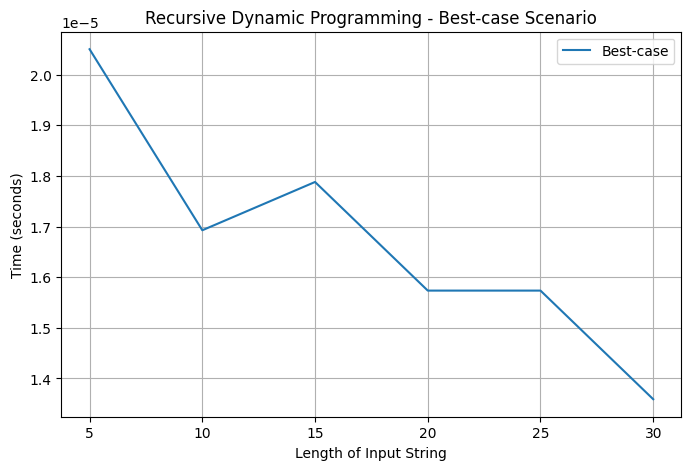

In [13]:
def run_best_case():
    lengths = [5,10,15,20,25,30]  # Lengths of input strings for best case
    constant_string = "constantstring"

    best_times = []

    for length in lengths:
        input_string = constant_string[:length]  # Using constant string of specified length
        best_time = measure_time(recursive_dynamic_programming, input_string, input_string)
        best_times.append(best_time)

    plt.figure(figsize=(8, 5))
    plt.plot(lengths, best_times, label='Best-case')
    plt.xlabel('Length of Input String')
    plt.ylabel('Time (seconds)')
    plt.title('Recursive Dynamic Programming - Best-case Scenario')
    plt.legend()
    plt.grid(True)
    plt.show()
run_best_case()

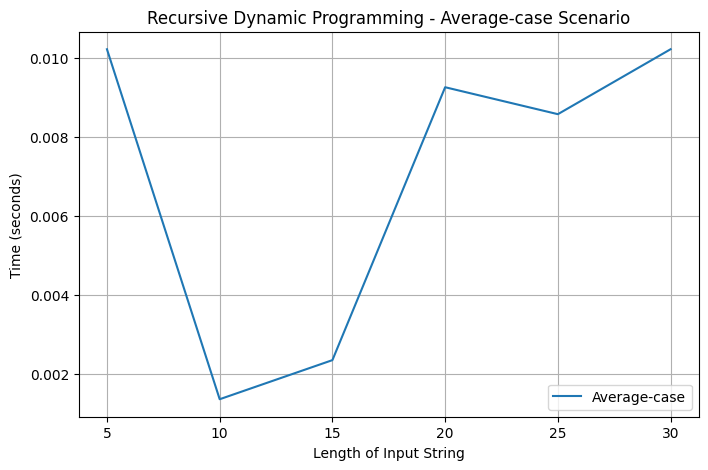

In [12]:
def run_average_case():
    lengths = [5,10,15,20,25,30]  # Lengths of input strings for average case
    constant_string = "constantstring"

    average_times = []

    for length in lengths:
        input_string = generate_random_string(length)  # Generating random input string
        average_time = measure_time(recursive_dynamic_programming, input_string, constant_string)
        average_times.append(average_time)

    plt.figure(figsize=(8, 5))
    plt.plot(lengths, average_times, label='Average-case')
    plt.xlabel('Length of Input String')
    plt.ylabel('Time (seconds)')
    plt.title('Recursive Dynamic Programming - Average-case Scenario')
    plt.legend()
    plt.grid(True)
    plt.show()
run_average_case()

In [22]:
def iterative_dynamic_programming(a, b):
    m, n = len(a), len(b)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i

    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if a[i - 1] == b[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    return dp[m][n]


In [23]:
import random
import string

def generate_different_string(length):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))


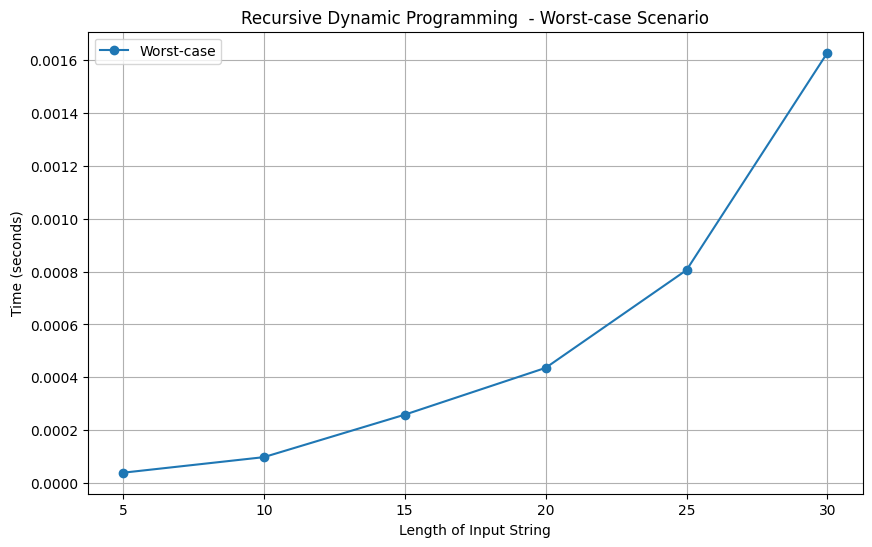

In [29]:
def run_worst_case():
    lengths = [5,10,15,20,25,30]  # Lengths of input strings for worst case

    worst_times = []

    for length in lengths:
        input_string = generate_random_string(length)
        constant_string = generate_different_string(length)
        worst_time = measure_time(iterative_dynamic_programming, input_string, constant_string)
        worst_times.append(worst_time)

    plt.figure(figsize=(10, 6))
    plt.plot(lengths, worst_times, label='Worst-case', marker='o')
    plt.xlabel('Length of Input String')
    plt.ylabel('Time (seconds)')
    plt.title('Recursive Dynamic Programming  - Worst-case Scenario')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run worst-case scenario
run_worst_case()
